Faça o seu gráfico utilizando recursos computacionais.
• Aplique o código implementado do Método de Newton adotando os pontos iniciais indicados
em cada caso, tomando ε = 10−8

e maxit = 20 .

• Imprima a tabela referente aos resultados de cada iteração, conforme as instruções.

• A partir dos gráficos, de argumentos matemáticos e/ou dos resultados exibidos nas tabelas, ex-
plique o comportamento do Método de Newton para cada ponto inicial dado.

In [32]:
import numpy as np
import pandas as pd

In [72]:
equation_one = lambda x: x*(np.exp(-x))
deriv_equation_one = lambda x: np.exp(-x) - x*np.exp(-x)

equation_two = lambda x: x**3 - x - 3
deriv_equation_two = lambda x: 3*x**2 - 1

equation_three = lambda x: np.arctan(x)
deriv_equation_three = lambda x: 1/(x**2 + 1)

### Método da Bisseção

In [18]:
MAXIT = 20
TOL = 10**(-8)

In [81]:
def newton_method(
  f: callable,
  f_linha: callable,
  x0: float,
  maxit: int = MAXIT,
  tol: float = TOL
):
  """ Método de Newton para encontrar raízes de funções

  Args:
    f (callable): função a ser analisada
    f_linha (float): derivada da função
    x0 (float): chute inicial
    maxit (int, optional): número máximo de iterações. Defaults to MAXIT.
    tol (float, optional): tolerância. Defaults to TOL.

  Returns:
    dataframe: tabela com os resultados
  """
  df = pd.DataFrame(columns=['x', 'f(x)', 'f_linha(x)', 'x - x0'])
  x = x0
  for i in range(maxit):
    df.loc[i] = [x, f(x), f_linha(x), x - x0]
    if np.abs(f(x)) < tol:
      return df
    x = x - f(x)/f_linha(x)
  return df

In [77]:
def bisseccao(
  f: callable,
  a: float,
  b: float,
  maxit: int = MAXIT,
  tol: float = TOL
):
  """ Método da bisseccao para encontrar raízes de funções

  Args:
    f (callable): função a ser analisada
    a (float):  limite inferior
    b (float): limite superior
    maxit (int, optional): número máximo de iterações. Defaults to MAXIT.
    tol (float, optional): tolerância. Defaults to TOL.

  Returns:
    float: raiz da função
  """

  df = pd.DataFrame(columns=['k', 'x', 'f(x)', 'x - x0'])

  for i in range(maxit):
    x = (a + b)/2
    df.loc[i] = [i, x, f(x), x - a]
    if np.abs(f(x)) < tol:
      return df
    if f(a)*f(x) < 0:
      b = x
    else:
      a = x
  return df


In [83]:
def secant_method(
    f,
    x0,
    x02,
    tol = TOL,
    max_it = MAXIT
):
    """ Método da secante para encontrar raízes de funções

    Args:
        f (callable): função a ser analisada
        x0 (float): chute inicial
        x02 (float): chute inicial
        tol (float, optional): tolerância. Defaults to TOL.
        maxit (int, optional): número máximo de iterações. Defaults to MAXIT.

    Returns:
        float: raiz da função
    """
    df = pd.DataFrame(columns=['xk', 'f(xk)', 'stepk'])
    for k in range(max_it):
        xk = x0 - f(x0)*(x0-x02)/(f(x0)-f(x02))
        if abs(f(xk)) < tol:
            break
        x02 = x0
        x0 = xk
        df.loc[k] = [xk, f(xk), x0-x02]
    return df


In [84]:
newton_equation_one = newton_method(equation_one, deriv_equation_one, 0.5)


In [85]:
newton_equation_one = newton_method(equation_one, x0=2, f_linha=deriv_equation_one)
newton_equation_one

,x,f(x),f_linha(x),x - x0
0,2.000000,2.706706e-01,-1.353353e-01,0.000000
1,4.000000,7.326256e-02,-5.494692e-02,2.000000
2,5.333333,2.574907e-02,-2.092112e-02,3.333333
3,6.564103,9.255968e-03,-7.845879e-03,4.564103
4,7.743826,3.356253e-03,-2.922843e-03,5.743826
5,8.892110,1.222392e-03,-1.084923e-03,6.892110
6,10.018819,4.463740e-04,-4.018204e-04,8.018819
7,11.129698,1.632740e-04,-1.486039e-04,9.129698
8,12.228418,5.979102e-05,-5.490151e-05,10.228418
9,13.317477,2.191367e-05,-2.026819e-05,11.317477


In [64]:
import seaborn as sns


<AxesSubplot:xlabel='xk', ylabel='f(xk)'>

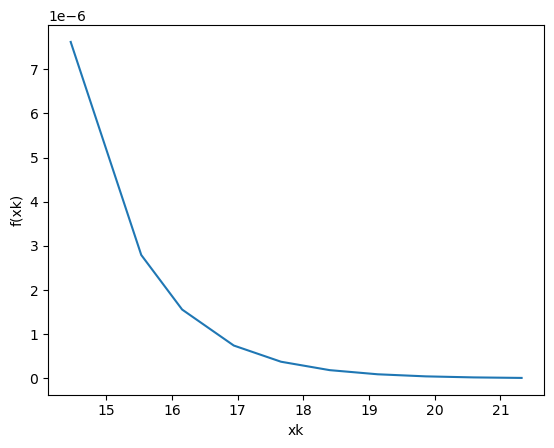

In [67]:
sns.lineplot(data=secant_equation_one, x='xk', y='f(xk)')

<AxesSubplot:xlabel='k', ylabel='stepk'>

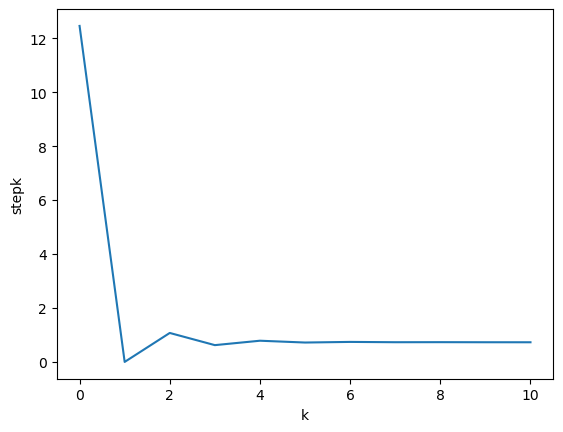

In [62]:
sns.lineplot(data=kkkkk, x='k', y='stepk')

In [36]:
df.loc[0] = [0, 0.5, equation_one(0.5), 'bisseccao']

In [37]:
df

,k,xk,f(xk),stepk
0,0,0.5,0.303265,bisseccao
